In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.file_picker import pick_image_cv2

# ---- Load tiny template image ----
image, path = pick_image_cv2(title="Select a tiny template image")

template = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
# ---- Create super-resolution object ----
sr = cv2.dnn_superres.DnnSuperResImpl_create()

# ---- Read the model ----
sr.readModel("C:\\Users\\Gabriel\\Documents\\Dissertation\\Code\\models\\upscaling\\EDSR_x4.pb")  # model file
sr.setModel("edsr", 4)       # model name + scale factor

# ---- Upscale the template ----
template_upscaled = sr.upsample(template)

In [10]:
# ---- Optional: Sharpen after upscaling ----
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

template_sharp = cv2.filter2D(template_upscaled, -1, kernel)

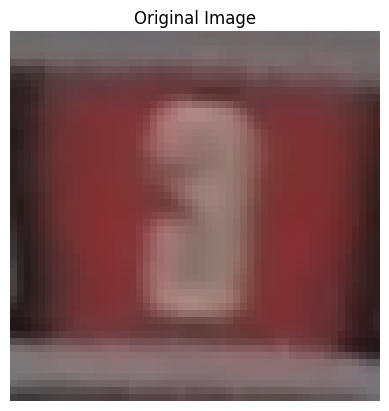

Original shape: (53, 53, 3)


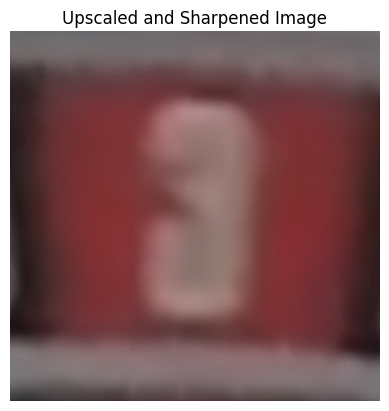

Upscaled shape: (212, 212, 3)
Processed template saved to C:\Users\Gabriel\Documents\Dissertation\Code\data\template_3_x4_test.png


In [11]:
# ---- Display the results ----
plt.imshow(template)
plt.title('Original Image')
plt.axis('off')
plt.show()
print(f"Original shape: {template.shape}")

plt.imshow(template_sharp)
plt.title('Upscaled and Sharpened Image')
plt.axis('off')
plt.show()
print(f"Upscaled shape: {template_sharp.shape}")

# ---- Save the processed template ----

# ask for name and save
output_name = input("Enter a name for the processed template (without extension): ")
output_path = f"C:\\Users\\Gabriel\\Documents\\Dissertation\\Code\\data\\{output_name}.png"
cv2.imwrite(output_path, cv2.cvtColor(template_sharp, cv2.COLOR_RGB2BGR))
print(f"Processed template saved to {output_path}")